# Week 5 - Autoencoders

In [1]:
import h2o
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_232"; OpenJDK Runtime Environment (build 1.8.0_232-8u232-b09-0ubuntu1~19.04.1-b09); OpenJDK 64-Bit Server VM (build 25.232-b09, mixed mode)
  Starting server from /home/megan/Projects/h2oclass/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpu_jftkc3
  JVM stdout: /tmp/tmpu_jftkc3/h2o_megan_started_from_python.out
  JVM stderr: /tmp/tmpu_jftkc3/h2o_megan_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,America/Chicago
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.3
H2O cluster version age:,17 days
H2O cluster name:,H2O_from_python_megan_fj9pbc
H2O cluster total nodes:,1
H2O cluster free memory:,1.520 Gb
H2O cluster total cores:,3
H2O cluster allowed cores:,3
H2O cluster status:,"accepting new members, healthy"


In [3]:
# load the iris dataset
url = 'http://h2o-public-test-data.s3.amazonaws.com/smalldata/iris/iris_wheader.csv'
iris = h2o.import_file(url)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [4]:
# split the data into train and test
train, test = iris.split_frame([0.8], seed=123)

In [5]:
train.nrows

121

In [6]:
x = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid']

In [7]:
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator

In [8]:
m_AE_4 = H2OAutoEncoderEstimator(
    hidden=[4],
    activation='Tanh', # usual activation for autoencoder
    epochs=300,
    model_id='m_AE_4',
    train_samples_per_iteration=train.nrow, # set these to view details, generally would leave as defaults
    score_interval=0,
    score_duty_cycle=1.0
)
%time m_AE_4.train(x, None, train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 80.1 ms, sys: 19.3 ms, total: 99.4 ms
Wall time: 2.35 s


In [9]:
sh = m_AE_4.score_history()
sh.head()

,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_mse
0,,2020-02-23 11:28:14,0.183 sec,0.00000 obs/sec,0.0,0,0.0,0.291900,0.085206
1,,2020-02-23 11:28:14,0.231 sec,2630 obs/sec,1.0,1,121.0,0.202966,0.041195
2,,2020-02-23 11:28:14,0.242 sec,4481 obs/sec,2.0,2,242.0,0.159763,0.025524
3,,2020-02-23 11:28:14,0.250 sec,6050 obs/sec,3.0,3,363.0,0.141753,0.020094
4,,2020-02-23 11:28:14,0.258 sec,7333 obs/sec,4.0,4,484.0,0.131072,0.017180


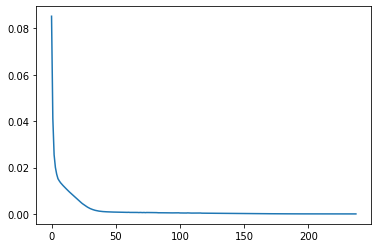

In [10]:
sh['training_mse'].plot()

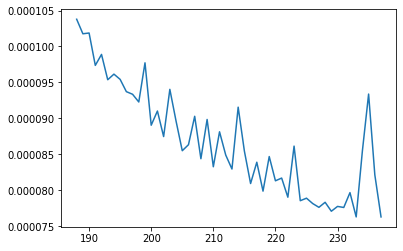

In [11]:
# look more closely at the tail
sh['training_mse'].tail(50).plot()

In [12]:
# we may have stopped too early so increase stopping rounds to 15
# likely because we are scoring after every observation
m_AE_4 = H2OAutoEncoderEstimator(
    hidden=[4],
    activation='Tanh',
    epochs=300,
    model_id='m_AE_4',
    train_samples_per_iteration=train.nrow,
    score_interval=0,
    score_duty_cycle=1.0,
    stopping_rounds=15
)
%time m_AE_4.train(x, None, train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 52.9 ms, sys: 14.6 ms, total: 67.5 ms
Wall time: 1.34 s


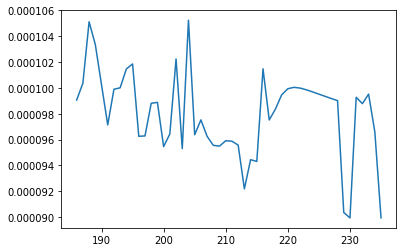

In [13]:
sh = m_AE_4.score_history()
sh['training_mse'].tail(50).plot()

In [14]:
# now reduce the hidden layers to 3, instead of 4
m_AE_3 = H2OAutoEncoderEstimator(
    hidden=[3],
    activation='Tanh',
    epochs=300,
    model_id='m_AE_3',
    train_samples_per_iteration=train.nrow,
    score_interval=0,
    score_duty_cycle=1.0,
    stopping_rounds=15
)
%time m_AE_3.train(x, None, train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 35.4 ms, sys: 17.2 ms, total: 52.6 ms
Wall time: 1.06 s


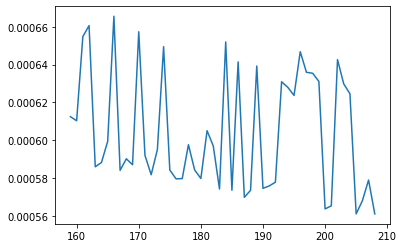

In [15]:
sh = m_AE_3.score_history()
sh['training_mse'].tail(50).plot()

In [16]:
# now reduce the hidden layers to 2
m_AE_2 = H2OAutoEncoderEstimator(
    hidden=[2],
    activation='Tanh',
    epochs=300,
    model_id='m_AE_2',
    train_samples_per_iteration=train.nrow,
    score_interval=0,
    score_duty_cycle=1.0,
    stopping_rounds=15
)
%time m_AE_2.train(x, None, train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 117 ms, sys: 10.9 ms, total: 128 ms
Wall time: 2.32 s


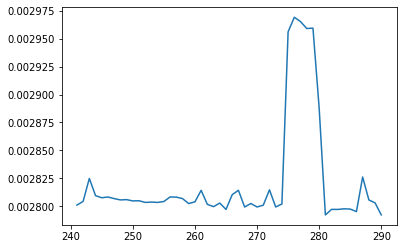

In [17]:
sh = m_AE_2.score_history()
sh['training_mse'].tail(50).plot()

Each time we reduce the number of hidden layers, we are asking the autoencoder to try to compress the 4 input features into fewer and fewer dimensions.  This results in an increase in the reconstruction error, as expected - i.e. the reconstruction is not perfect and gets harder with fewer dimensions.

In [18]:
# now reduce the hidden layers to 1
m_AE_1 = H2OAutoEncoderEstimator(
    hidden=[1],
    activation='Tanh',
    epochs=300,
    model_id='m_AE_2',
    train_samples_per_iteration=train.nrow,
    score_interval=0,
    score_duty_cycle=1.0,
    stopping_rounds=15
)
%time m_AE_1.train(x, None, train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 18.5 ms, sys: 1.44 ms, total: 19.9 ms
Wall time: 462 ms


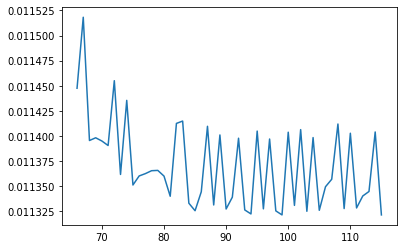

In [19]:
sh = m_AE_1.score_history()
sh['training_mse'].tail(50).plot()

In [20]:
# multilayer autoencoder
m_AE_5_3_5 = H2OAutoEncoderEstimator(
    hidden=[5, 3, 5], # note the symmetry
    activation='Tanh',
    epochs=300,
    model_id='m_AE_5_3_5',
    train_samples_per_iteration=train.nrow,
    score_interval=0,
    score_duty_cycle=1.0,
    stopping_rounds=15
)
%time m_AE_5_3_5.train(x, None, train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 20.7 ms, sys: 13 µs, total: 20.7 ms
Wall time: 456 ms


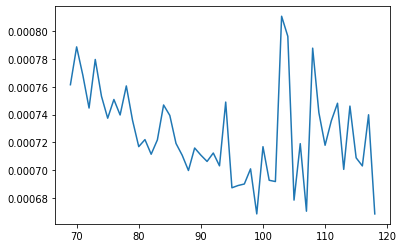

In [21]:
sh = m_AE_5_3_5.score_history()
sh['training_mse'].tail(50).plot()

In [22]:
# stacked autoencoder
# builds on the m_AE_3 model from above
train_AE_3 = m_AE_3.deepfeatures(train, 0) # here the 0 means the first hidden layer

deepfeatures progress: |██████████████████████████████████████████████████| 100%


In [23]:
train_AE_3.dim

[121, 3]

In [24]:
train_AE_3

DF.L1.C1,DF.L1.C2,DF.L1.C3
0.223158,0.596469,-0.0932727
0.335713,0.527671,0.104517
0.283171,0.596437,0.0659874
0.300638,0.574165,0.118284
0.194634,0.624268,-0.111499
0.0766993,0.602929,-0.241533
0.204316,0.630249,0.0266402
0.242662,0.582219,-0.0427383
0.1829,0.59016,-0.20157
0.233981,0.596885,-0.010404


In [25]:
m_AE_3x3 = H2OAutoEncoderEstimator(
    hidden=[3],
    activation='Tanh',
    epochs=300,
    model_id='m_AE_3x3',
    train_samples_per_iteration=train.nrow,
    score_interval=0,
    score_duty_cycle=1.0,
    stopping_rounds=15
)
%time m_AE_3x3.train([0, 1, 2], None, train_AE_3)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 17.5 ms, sys: 11.9 ms, total: 29.4 ms
Wall time: 661 ms


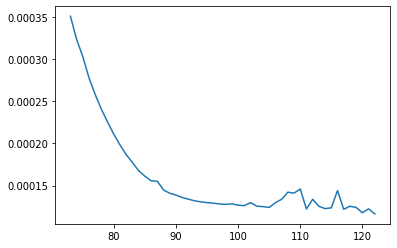

In [26]:
sh = m_AE_3x3.score_history()
sh['training_mse'].tail(50).plot()

In [27]:
# anomalies
x = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']

In [28]:
m_anomaly16 = H2OAutoEncoderEstimator(
    hidden=[16],
    activation='Tanh',
    epochs=300,
    model_id='m_anomaly16',
    train_samples_per_iteration=train.nrow,
    score_interval=0,
    score_duty_cycle=1.0,
    stopping_rounds=15
)
%time m_anomaly16.train(x, None, iris) # we used the full dataset here

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 48.1 ms, sys: 12.7 ms, total: 60.9 ms
Wall time: 1.58 s


In [29]:
anomalies = m_anomaly16.anomaly(iris).cbind(iris).as_data_frame()

In [30]:
s = anomalies.sort_values('Reconstruction.MSE', ascending=False)

In [31]:
# hardest to learn
s.head()

,Reconstruction.MSE,sepal_len,sepal_wid,petal_len,petal_wid,class
43,0.000337,5.0,3.5,1.6,0.6,Iris-setosa
131,0.000313,7.9,3.8,6.4,2.0,Iris-virginica
41,0.000252,4.5,2.3,1.3,0.3,Iris-setosa
106,0.000238,4.9,2.5,4.5,1.7,Iris-virginica
117,0.000219,7.7,3.8,6.7,2.2,Iris-virginica


In [32]:
# most typical examples
s.tail()

,Reconstruction.MSE,sepal_len,sepal_wid,petal_len,petal_wid,class
4,0.000004,5.0,3.6,1.4,0.2,Iris-setosa
0,0.000004,5.1,3.5,1.4,0.2,Iris-setosa
88,0.000004,5.6,3.0,4.1,1.3,Iris-versicolor
148,0.000004,6.2,3.4,5.4,2.3,Iris-virginica
130,0.000004,7.4,2.8,6.1,1.9,Iris-virginica
